# Pre-processing and Training Data Development

In this section, I will normalize and standardize all the features in the data as well as find feature importance.

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn import preprocessing

In [2]:
!pip install joblib

In [3]:
import joblib

Load the data

In [4]:
df = pd.read_csv('Wrangled.csv')

C:\Users\veron\AppData\Local\Temp\ipykernel_26540\2296681516.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Wrangled.csv')


In [5]:
df.head()

,Unnamed: 0,Rfrg_Prvdr_Geo_Lvl,Rfrg_Prvdr_Geo_Cd,Rfrg_Prvdr_Geo_Desc,BETOS_Lvl,BETOS_Cd,BETOS_Desc,HCPCS_Cd,HCPCS_Desc,Suplr_Rentl_Ind,Tot_Rfrg_Prvdrs,Tot_Suplrs,Tot_Suplr_Benes,Tot_Suplr_Clms,Tot_Suplr_Srvcs,Avg_Suplr_Sbmtd_Chrg,Avg_Suplr_Mdcr_Alowd_Amt,Avg_Suplr_Mdcr_Pymt_Amt,Avg_Suplr_Mdcr_Stdzd_Amt
0,0,National,6.0,National,Drugs and Nutritional Products,O1C,Enteral and parenteral,B4034,"Enteral feeding supply kit; syringe fed, per d...",N,28183,1745,33451.0,171371,4627387,58.266520,3.718512,2.918066,3.047039
1,1,National,6.0,National,Drugs and Nutritional Products,O1C,Enteral and parenteral,B4035,"Enteral feeding supply kit; pump fed, per day,...",N,27342,1758,39110.0,271836,7050743,75.495042,6.433860,5.067509,5.552222
2,2,National,6.0,National,Drugs and Nutritional Products,O1C,Enteral and parenteral,B4036,"Enteral feeding supply kit; gravity fed, per d...",N,6166,933,7171.0,41181,1116382,75.172639,5.036933,3.959289,4.100195
3,3,National,6.0,National,Drugs and Nutritional Products,O1C,Enteral and parenteral,B4081,Nasogastric tubing with stylet,N,14,12,13.0,20,33,113.736061,17.292727,13.833939,13.579697
4,4,National,6.0,National,Drugs and Nutritional Products,O1C,Enteral and parenteral,B4082,Nasogastric tubing without stylet,N,16,16,16.0,21,43,99.110930,12.532093,9.502326,9.463488


There seems to be an additional column containing the indexes of the DataFrame, we will remove this Unnamed column using the drop() method.

In [6]:
df = df.drop(df.columns[0], axis=1)

In [7]:
df.head()

,Rfrg_Prvdr_Geo_Lvl,Rfrg_Prvdr_Geo_Cd,Rfrg_Prvdr_Geo_Desc,BETOS_Lvl,BETOS_Cd,BETOS_Desc,HCPCS_Cd,HCPCS_Desc,Suplr_Rentl_Ind,Tot_Rfrg_Prvdrs,Tot_Suplrs,Tot_Suplr_Benes,Tot_Suplr_Clms,Tot_Suplr_Srvcs,Avg_Suplr_Sbmtd_Chrg,Avg_Suplr_Mdcr_Alowd_Amt,Avg_Suplr_Mdcr_Pymt_Amt,Avg_Suplr_Mdcr_Stdzd_Amt
0,National,6.0,National,Drugs and Nutritional Products,O1C,Enteral and parenteral,B4034,"Enteral feeding supply kit; syringe fed, per d...",N,28183,1745,33451.0,171371,4627387,58.266520,3.718512,2.918066,3.047039
1,National,6.0,National,Drugs and Nutritional Products,O1C,Enteral and parenteral,B4035,"Enteral feeding supply kit; pump fed, per day,...",N,27342,1758,39110.0,271836,7050743,75.495042,6.433860,5.067509,5.552222
2,National,6.0,National,Drugs and Nutritional Products,O1C,Enteral and parenteral,B4036,"Enteral feeding supply kit; gravity fed, per d...",N,6166,933,7171.0,41181,1116382,75.172639,5.036933,3.959289,4.100195
3,National,6.0,National,Drugs and Nutritional Products,O1C,Enteral and parenteral,B4081,Nasogastric tubing with stylet,N,14,12,13.0,20,33,113.736061,17.292727,13.833939,13.579697
4,National,6.0,National,Drugs and Nutritional Products,O1C,Enteral and parenteral,B4082,Nasogastric tubing without stylet,N,16,16,16.0,21,43,99.110930,12.532093,9.502326,9.463488


We will find the medical device with the most referring providers (most providers ordering this item) using the max() method.

In [8]:
tot_rfrg_prvdrs_max = df['Tot_Rfrg_Prvdrs'].max()
df.loc[df['Tot_Rfrg_Prvdrs'] == tot_rfrg_prvdrs_max]

,Rfrg_Prvdr_Geo_Lvl,Rfrg_Prvdr_Geo_Cd,Rfrg_Prvdr_Geo_Desc,BETOS_Lvl,BETOS_Cd,BETOS_Desc,HCPCS_Cd,HCPCS_Desc,Suplr_Rentl_Ind,Tot_Rfrg_Prvdrs,Tot_Suplrs,Tot_Suplr_Benes,Tot_Suplr_Clms,Tot_Suplr_Srvcs,Avg_Suplr_Sbmtd_Chrg,Avg_Suplr_Mdcr_Alowd_Amt,Avg_Suplr_Mdcr_Pymt_Amt,Avg_Suplr_Mdcr_Stdzd_Amt
592,National,6.0,National,Durable Medical Equipment,D1E,Other DME,A4253,Blood glucose test or reagent strips for home ...,N,233762,43511,1891407.0,5104070,13931820,61.932717,8.400779,5.964003,5.786099


We found that the blood glucose test/reagent strip is the most ordered item, we will create a separate DataFrame for the blood glucose test/reagent strip data.

In [9]:
blood_glucose_test = df[df.HCPCS_Cd == 'A4253']
blood_glucose_test.head()

,Rfrg_Prvdr_Geo_Lvl,Rfrg_Prvdr_Geo_Cd,Rfrg_Prvdr_Geo_Desc,BETOS_Lvl,BETOS_Cd,BETOS_Desc,HCPCS_Cd,HCPCS_Desc,Suplr_Rentl_Ind,Tot_Rfrg_Prvdrs,Tot_Suplrs,Tot_Suplr_Benes,Tot_Suplr_Clms,Tot_Suplr_Srvcs,Avg_Suplr_Sbmtd_Chrg,Avg_Suplr_Mdcr_Alowd_Amt,Avg_Suplr_Mdcr_Pymt_Amt,Avg_Suplr_Mdcr_Stdzd_Amt
592,National,6.0,National,Durable Medical Equipment,D1E,Other DME,A4253,Blood glucose test or reagent strips for home ...,N,233762,43511,1891407.0,5104070,13931820,61.932717,8.400779,5.964003,5.786099
1999,State,1.0,Alabama,Durable Medical Equipment,D1E,Other DME,A4253,Blood glucose test or reagent strips for home ...,N,3093,1406,25059.0,64060,181067,56.558110,8.423689,6.055243,5.858798
2624,State,2.0,Alaska,Durable Medical Equipment,D1E,Other DME,A4253,Blood glucose test or reagent strips for home ...,N,509,204,2394.0,5877,16216,64.369821,8.403106,5.852651,5.676490
3186,State,4.0,Arizona,Durable Medical Equipment,D1E,Other DME,A4253,Blood glucose test or reagent strips for home ...,N,4387,2262,29371.0,70945,207369,66.860627,8.386908,6.101452,5.931097
3987,State,5.0,Arkansas,Durable Medical Equipment,D1E,Other DME,A4253,Blood glucose test or reagent strips for home ...,N,2258,924,19444.0,51839,139633,49.084897,8.435714,6.028881,5.825964


There are 59 rows with blood glucose test/reagent strip information from various states and locations. 

In [10]:
blood_glucose_test.shape

(59, 18)

In [11]:
others = df[df.HCPCS_Cd != 'A4253']
others.shape

(40208, 18)

We will drop the unnecessary columns such as product descriptions and rental information.

In [12]:
blood_glucose_test = blood_glucose_test.drop(columns=['Rfrg_Prvdr_Geo_Lvl', 'Rfrg_Prvdr_Geo_Cd', 'BETOS_Lvl', 'BETOS_Cd', 'BETOS_Desc', 'HCPCS_Desc', 'Suplr_Rentl_Ind'])

In [13]:
blood_glucose_test.head()

,Rfrg_Prvdr_Geo_Desc,HCPCS_Cd,Tot_Rfrg_Prvdrs,Tot_Suplrs,Tot_Suplr_Benes,Tot_Suplr_Clms,Tot_Suplr_Srvcs,Avg_Suplr_Sbmtd_Chrg,Avg_Suplr_Mdcr_Alowd_Amt,Avg_Suplr_Mdcr_Pymt_Amt,Avg_Suplr_Mdcr_Stdzd_Amt
592,National,A4253,233762,43511,1891407.0,5104070,13931820,61.932717,8.400779,5.964003,5.786099
1999,Alabama,A4253,3093,1406,25059.0,64060,181067,56.558110,8.423689,6.055243,5.858798
2624,Alaska,A4253,509,204,2394.0,5877,16216,64.369821,8.403106,5.852651,5.676490
3186,Arizona,A4253,4387,2262,29371.0,70945,207369,66.860627,8.386908,6.101452,5.931097
3987,Arkansas,A4253,2258,924,19444.0,51839,139633,49.084897,8.435714,6.028881,5.825964


Create dummy features for the categorical columns using the get_dummies() method.

In [14]:
dummy_df = pd.get_dummies(blood_glucose_test['Rfrg_Prvdr_Geo_Desc'])

Double check that all of the features are now numerical using dtypes method.

In [15]:
dummy_df.dtypes

Alabama                 uint8
Alaska                  uint8
Arizona                 uint8
Arkansas                uint8
Armed Forces Europe     uint8
Armed Forces Pacific    uint8
California              uint8
Colorado                uint8
Connecticut             uint8
Delaware                uint8
District of Columbia    uint8
Florida                 uint8
Foreign Country         uint8
Georgia                 uint8
Guam                    uint8
Hawaii                  uint8
Idaho                   uint8
Illinois                uint8
Indiana                 uint8
Iowa                    uint8
Kansas                  uint8
Kentucky                uint8
Louisiana               uint8
Maine                   uint8
Maryland                uint8
Massachusetts           uint8
Michigan                uint8
Minnesota               uint8
Mississippi             uint8
Missouri                uint8
Montana                 uint8
National                uint8
Nebraska                uint8
Nevada    

In [16]:
dummy_df.head()

,Alabama,Alaska,Arizona,Arkansas,Armed Forces Europe,Armed Forces Pacific,California,Colorado,Connecticut,Delaware,...,Texas,Unknown,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1999,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2624,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3186,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3987,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
dummy_df.shape

(59, 59)

Using the pd.concat() method, we will join the dummy features into the original DataFrame blood_glucose_test.

In [18]:
blood_glucose_test = pd.concat([blood_glucose_test, dummy_df], axis=1)
blood_glucose_test.head()

,Rfrg_Prvdr_Geo_Desc,HCPCS_Cd,Tot_Rfrg_Prvdrs,Tot_Suplrs,Tot_Suplr_Benes,Tot_Suplr_Clms,Tot_Suplr_Srvcs,Avg_Suplr_Sbmtd_Chrg,Avg_Suplr_Mdcr_Alowd_Amt,Avg_Suplr_Mdcr_Pymt_Amt,...,Texas,Unknown,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
592,National,A4253,233762,43511,1891407.0,5104070,13931820,61.932717,8.400779,5.964003,...,0,0,0,0,0,0,0,0,0,0
1999,Alabama,A4253,3093,1406,25059.0,64060,181067,56.558110,8.423689,6.055243,...,0,0,0,0,0,0,0,0,0,0
2624,Alaska,A4253,509,204,2394.0,5877,16216,64.369821,8.403106,5.852651,...,0,0,0,0,0,0,0,0,0,0
3186,Arizona,A4253,4387,2262,29371.0,70945,207369,66.860627,8.386908,6.101452,...,0,0,0,0,0,0,0,0,0,0
3987,Arkansas,A4253,2258,924,19444.0,51839,139633,49.084897,8.435714,6.028881,...,0,0,0,0,0,0,0,0,0,0


Then drop the original Rfrg_Prvdr_Geo_Desc column containing the categorical values.

In [19]:
blood_glucose_test.drop(['Rfrg_Prvdr_Geo_Desc'], axis=1, inplace=True)
blood_glucose_test.head()

,HCPCS_Cd,Tot_Rfrg_Prvdrs,Tot_Suplrs,Tot_Suplr_Benes,Tot_Suplr_Clms,Tot_Suplr_Srvcs,Avg_Suplr_Sbmtd_Chrg,Avg_Suplr_Mdcr_Alowd_Amt,Avg_Suplr_Mdcr_Pymt_Amt,Avg_Suplr_Mdcr_Stdzd_Amt,...,Texas,Unknown,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
592,A4253,233762,43511,1891407.0,5104070,13931820,61.932717,8.400779,5.964003,5.786099,...,0,0,0,0,0,0,0,0,0,0
1999,A4253,3093,1406,25059.0,64060,181067,56.558110,8.423689,6.055243,5.858798,...,0,0,0,0,0,0,0,0,0,0
2624,A4253,509,204,2394.0,5877,16216,64.369821,8.403106,5.852651,5.676490,...,0,0,0,0,0,0,0,0,0,0
3186,A4253,4387,2262,29371.0,70945,207369,66.860627,8.386908,6.101452,5.931097,...,0,0,0,0,0,0,0,0,0,0
3987,A4253,2258,924,19444.0,51839,139633,49.084897,8.435714,6.028881,5.825964,...,0,0,0,0,0,0,0,0,0,0


Using LabelEncoder() method to convert the HCPCS_Cd column to a numerical value.

In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
blood_glucose_test['HCPCS_Cd'] = label_encoder.fit_transform(blood_glucose_test['HCPCS_Cd'])

In [21]:
blood_glucose_test.head()

,HCPCS_Cd,Tot_Rfrg_Prvdrs,Tot_Suplrs,Tot_Suplr_Benes,Tot_Suplr_Clms,Tot_Suplr_Srvcs,Avg_Suplr_Sbmtd_Chrg,Avg_Suplr_Mdcr_Alowd_Amt,Avg_Suplr_Mdcr_Pymt_Amt,Avg_Suplr_Mdcr_Stdzd_Amt,...,Texas,Unknown,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
592,0,233762,43511,1891407.0,5104070,13931820,61.932717,8.400779,5.964003,5.786099,...,0,0,0,0,0,0,0,0,0,0
1999,0,3093,1406,25059.0,64060,181067,56.558110,8.423689,6.055243,5.858798,...,0,0,0,0,0,0,0,0,0,0
2624,0,509,204,2394.0,5877,16216,64.369821,8.403106,5.852651,5.676490,...,0,0,0,0,0,0,0,0,0,0
3186,0,4387,2262,29371.0,70945,207369,66.860627,8.386908,6.101452,5.931097,...,0,0,0,0,0,0,0,0,0,0
3987,0,2258,924,19444.0,51839,139633,49.084897,8.435714,6.028881,5.825964,...,0,0,0,0,0,0,0,0,0,0


We will now split our dataset into features (X) and the target variable - purchasing price (y)

In [22]:
X = blood_glucose_test.drop(columns='Avg_Suplr_Sbmtd_Chrg')
y = blood_glucose_test['Avg_Suplr_Sbmtd_Chrg']

Split the data into training and testing sets then make sure the shape attributes match and the dtypes are numerical.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

In [24]:
X_train.shape, X_test.shape

((47, 68), (12, 68))

In [25]:
y_train.shape, y_test.shape

((47,), (12,))

In [26]:
X_train.head()

,HCPCS_Cd,Tot_Rfrg_Prvdrs,Tot_Suplrs,Tot_Suplr_Benes,Tot_Suplr_Clms,Tot_Suplr_Srvcs,Avg_Suplr_Mdcr_Alowd_Amt,Avg_Suplr_Mdcr_Pymt_Amt,Avg_Suplr_Mdcr_Stdzd_Amt,Alabama,...,Texas,Unknown,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
23050,0,1716,945,10871.0,27241,78164,8.437167,6.118913,5.911879,0,...,0,0,0,0,0,0,0,0,0,0
29188,0,2659,1002,22299.0,55874,154464,8.407318,6.044145,5.861016,0,...,0,0,0,0,0,0,0,0,0,0
25118,0,1474,747,9548.0,24520,70740,8.422987,5.878824,5.687849,0,...,0,0,0,0,0,0,0,0,0,0
10643,0,1361,579,8193.0,21879,57659,8.398938,5.849704,5.677896,0,...,0,0,0,0,0,0,0,0,0,0
29921,0,3330,1313,18807.0,49371,141176,8.440170,5.931617,5.728350,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
X_train.dtypes

HCPCS_Cd             int32
Tot_Rfrg_Prvdrs      int64
Tot_Suplrs           int64
Tot_Suplr_Benes    float64
Tot_Suplr_Clms       int64
                    ...   
Virginia             uint8
Washington           uint8
West Virginia        uint8
Wisconsin            uint8
Wyoming              uint8
Length: 68, dtype: object

In [28]:
X_test.dtypes

HCPCS_Cd             int32
Tot_Rfrg_Prvdrs      int64
Tot_Suplrs           int64
Tot_Suplr_Benes    float64
Tot_Suplr_Clms       int64
                    ...   
Virginia             uint8
Washington           uint8
West Virginia        uint8
Wisconsin            uint8
Wyoming              uint8
Length: 68, dtype: object

In [29]:
train_mean = y_train.mean()
train_mean

60.97952190987234

The average purchasing price for the training set is $60.98.

In [30]:
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[60.97952191]])

Running the dummy regressor model with strategy mean also resulted in the same purchasing price $60.98 for the training set.

In [31]:
def r_squared(y, ypred):
    ybar = np.sum(y) / len(y)
    sum_sq_tot = np.sum((y - ybar)**2)
    sum_sq_res = np.sum((y - ypred)**2)
    R2 = 1.0 - sum_sq_tot / sum_sq_res
    return R2

In [32]:
y_tr_pred_ = train_mean * np.ones(len(y_train))
y_tr_pred_[:5]

array([60.97952191, 60.97952191, 60.97952191, 60.97952191, 60.97952191])

In [33]:
y_tr_pred = dumb_reg.predict(X_train)
y_tr_pred[:5]

array([60.97952191, 60.97952191, 60.97952191, 60.97952191, 60.97952191])

In [34]:
r_squared(y_train, y_tr_pred)

0.0

Finding the r-squared of the training set resulted in the same mean and 0.0 value, this indicates that the baseline model perfectly predicts the observed values and has no residual error.

In [35]:
y_te_pred = train_mean * np.ones(len(y_test))
r_squared(y_test, y_te_pred)

0.25134709893080365

This r-squared value suggests that approximately 25.13% of the variance in y_test is explained by the predictions, this indicatese that the model does have some predictive power but still leaves a significant amount of variability in purchasing price.

In [36]:
def mae(y, ypred):
    abs_error = np.abs(y - ypred)
    mae = np.mean(abs_error)
    return mae

In [37]:
mae(y_train, y_tr_pred)

4.307658744050702

In [38]:
mae(y_test, y_te_pred)

3.4296720807925536

Mean absolute error is telling us that on average we may expect to be off around $3 for the purchasing price based on an average of known values.

In [39]:
def mse(y, ypred):
    sq_error = (y - ypred)**2
    mse = np.mean(sq_error)
    return mse

In [40]:
mse(y_train, y_tr_pred)

32.00916330006543

In [41]:
mse(y_test, y_te_pred)

20.794573332077928

In [42]:
np.sqrt([mse(y_train, y_tr_pred), mse(y_test, y_te_pred)])

array([5.65766412, 4.56010672])

The mse on the test set is lower than the mse on the training set which suggests that the model is generalizing well to unseen data and the model is not overfitting to the training data. Overall, the model seems to be performing well, with better performance observed on the test set compared to the training set, suggesting good generalization capability.

##### R-Squared

In [43]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.0, -0.3357324850699699)

##### Mean absolute error

In [44]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(4.307658744050702, 3.4296720807925536)

##### Mean squared error

In [45]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(32.00916330006543, 20.794573332077928)

Learn the values to impute from the train set.

In [46]:
X_defaults_median = X_train.median()
X_defaults_median

HCPCS_Cd               0.0
Tot_Rfrg_Prvdrs     2401.0
Tot_Suplrs          1002.0
Tot_Suplr_Benes    19444.0
Tot_Suplr_Clms     51313.0
                    ...   
Virginia               0.0
Washington             0.0
West Virginia          0.0
Wisconsin              0.0
Wyoming                0.0
Length: 68, dtype: float64

Apply the imputation to both train and test splits.

In [47]:
X_tr = X_train.fillna(X_defaults_median)
X_te = X_test.fillna(X_defaults_median)

Scale the data using StandardScaler().

In [48]:
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

Train the model on Linear Regression.

In [49]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

In [50]:
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [51]:
median_r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
median_r2

(1.0, -0.09966923087628543)

R-squared value of 1.0 on the training set suggests that the model perfectly fits the training data after median imputation but may indicate overfitting. The negative r-squared value suggests that the model's predictions are worse than simply predicitng the mean of the purchasing price. This indicates poor model performance on the test data after median imputation. Overall, median imputation for missing values may not be suitable for improving model performance.

In [52]:
median_mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
median_mae

(4.384199858945299e-15, 3.117079137917562)

On average the estimate purchasing price is within $3 of the real price, this is the same as the previously found average.

In [53]:
median_mse = mean_squared_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
median_mse

(4.6190323641877116e-29, 3.117079137917562)

Low mae and mse on the training set suggests that the model may be overfitting to the training data after median imputation, the model is performing exceptionally well on the training data but not on the test data. The mae and mse on the test set are higher than those on the training test indicating poorer performance on unseen data. The model's predictions on the test data are not as accurate as on the training data. Overall, this may be indicating that the model is overfitting to the training data and poor generalization to unseen data after median imputation.

Learn the values to impute from the train set.

In [54]:
X_defaults_mean = X_train.mean()
X_defaults_mean

HCPCS_Cd                0.000000
Tot_Rfrg_Prvdrs      8621.595745
Tot_Suplrs           2542.234043
Tot_Suplr_Benes     69613.510638
Tot_Suplr_Clms     186262.170213
                       ...      
Virginia                0.000000
Washington              0.000000
West Virginia           0.021277
Wisconsin               0.000000
Wyoming                 0.021277
Length: 68, dtype: float64

Apply the imputation to both train and test splits.

In [55]:
X_tr = X_train.fillna(X_defaults_mean)
X_te = X_test.fillna(X_defaults_mean)

Scale the data.

In [56]:
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

Train the model on Linear Regression.

In [57]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

In [58]:
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [59]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(1.0, -0.09966923087628543)

In [60]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(4.384199858945299e-15, 3.117079137917562)

The r-squared value and mae is the same as the median imputation results.

In [61]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(4.6190323641877116e-29, 17.119560030232247)

However, the mse on the training set indicates a good fit to the training data but the higher mse on the test set suggests that the model may not be generalizing well to unseen data after mean imputation which may be due to overfitting to the training data. 

Define the pipeline.

In [62]:
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(), 
    LinearRegression()
)

In [63]:
type(pipe)

sklearn.pipeline.Pipeline

In [64]:
hasattr(pipe, 'fit'), hasattr(pipe, 'predict')

(True, True)

Fit the pipeline.

In [65]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

Assess performance on the train and test set.

In [66]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [67]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(1.0, -0.09966923087628543)

In [68]:
median_r2

(1.0, -0.09966923087628543)

The r-squared value is the same as the non-pipeline results.

In [69]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(4.384199858945299e-15, 3.117079137917562)

In [70]:
median_mae

(4.384199858945299e-15, 3.117079137917562)

The mae value is the same as the non-pipeline results.

In [71]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(4.6190323641877116e-29, 17.119560030232247)

In [72]:
median_mse

(4.6190323641877116e-29, 3.117079137917562)

The mse is similar to the non-pipeline results.

These results confirm the pipeline is doing exactly what is expected and the results are identical to earlier steps. 

Define the pipeline.

In [73]:
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(score_func=f_regression),
    LinearRegression()
)

Fit the pipeline.

In [74]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x0000014628AA62A0>)),
                ('linearregression', LinearRegression())])

Assess performance on the train and test set.

In [75]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [76]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.6999247052439765, -0.09338736100123701)

In [77]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(2.2686408054245684, 2.948832395271234)

The R2 score on the training set suggests that the model explains a substantial portion of the variance in the training data but the negative R2 score on the test set indicates poor performance on unseen data which may be due to overfitting or model misspecification. 

The mae values are relatively low indicating reasonable performance but the R2 score on the test set suggests that the model needs improvement to generalize well to unseen data.

Define a new pipeline to select a different number of features.

In [78]:
pipe15 = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(score_func=f_regression, k=15),
    LinearRegression()
)

Fit the pipeline.

In [79]:
pipe15.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=15,
                             score_func=<function f_regression at 0x0000014628AA62A0>)),
                ('linearregression', LinearRegression())])

Assess performance on the train and test set.

In [80]:
y_tr_pred = pipe15.predict(X_train)
y_te_pred = pipe15.predict(X_test)

In [81]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.8479475207519866, -0.11595577399381685)

In [82]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(1.6012393131957066, 2.9042675897977612)

The R2 score on the training set suggests that the model explains a substantial portion of the variance in the training data but the negative R2 score on the test set indicatse poor performance on unseen data which may be due to overfitting or model misspecification.

The mae values are relatively low on the training set indicating reasonable performance but the negative R2 score on the test set suggests that the model needs improvement to generalize well to unseen data.

Assessing performance using cross-validation.

In [83]:
cv_results = cross_validate(pipe15, X_train, y_train, cv=5)

In [84]:
cv_scores = cv_results['test_score']
cv_scores

array([ 0.23110639, -0.46522167, -0.26141711, -0.08858772,  0.43249643])

In [85]:
np.mean(cv_scores), np.std(cv_scores)

(-0.03032473638977502, 0.3251102174265179)

In [86]:
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([-0.68,  0.62])

The negative mean R-squared score and the presence of both positive and negative scores in the cross-validated results suggests that the model may not perform consistently well across different subsets of the data.

The wide confidence interval indicates uncertainty about the true mean performance of the model. This could be due to factors such as model complexity, data variability, or insufficient data for training.

List the names of all the parameters in a pipeline.

In [87]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'standardscaler', 'selectkbest', 'linearregression', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__keep_empty_features', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__positive'])

Create a nest pipeline with a range of k to investigate and pass it into GridSearchCV.

In [88]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [89]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [90]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x0000014628AA62A0>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]})

In [91]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [92]:
lr_grid_cv.best_params_

{'selectkbest__k': 4}

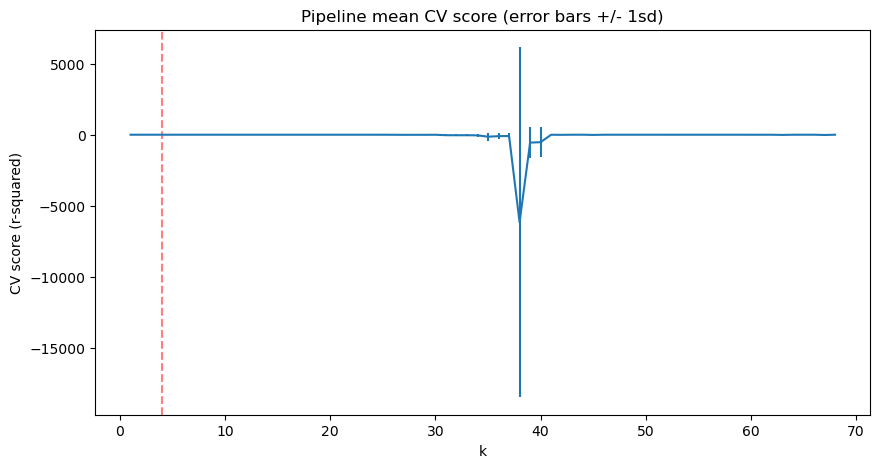

In [93]:
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

The above suggests that a good value for k is 4.

In [94]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

In [95]:
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

Avg_Suplr_Mdcr_Pymt_Amt     160.274626
Puerto Rico                  -1.384814
Avg_Suplr_Mdcr_Alowd_Amt    -33.559312
Avg_Suplr_Mdcr_Stdzd_Amt   -146.573691
dtype: float64

The average supplier Medicare payment amount is the biggest positive feature, this makes sense as submitted claims are paid for by Medicare first and may sometimes contribute to majority of the payment. Average supplier Medicare allowed amount and average supplier Medicare standardized amount is negatively associated with purchasing price, this is suggesting that the higher the medicare allowed/standardized payment amount then the lower the purchasing price. We can interpret this as some products may be getting paid out by Medicare more than others.

#### Random Forest Model

Define the pipeline.

In [96]:
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

Fit and assess performance using cross-validation.

In [97]:
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

In [98]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([-1.65137467,  0.22484498, -0.34189612,  0.34882302,  0.24223104])

In [99]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(-0.23547434976181653, 0.74801056956375)

The negative mean R-squared score suggests that the random forest model performs worse than a model that predicts the meean of the target variable.

The wide standard deviation of the cross-validation r-squared score indicates high variability in the model's performance acorss different folds of the data. 

Hyperparameter search using GridSearchCV

In [100]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [101]:
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [102]:
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strategy': ['mean', 'median'],
                         'standardscaler': [StandardScaler(), None]})

In [103]:
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 10,
 'simpleimputer__strategy': 'mean',
 'standardscaler': StandardScaler()}

Looks like imputing the mean and scaling the features helps.

In [104]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([-0.78547285, -0.01646868,  0.03025852,  0.24656872,  0.23064526])

In [105]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(-0.05889380609151858, 0.37810193084498334)

The negative mean r-squared score suggets that the best random forect model performs worse than a model that predicts the mean of the purchasing price, this indicates suboptimal overall performance of the model.

The moderate standard deviation of the cross-validated r-squared score indicates variability in the model's performance across different folds of the data.

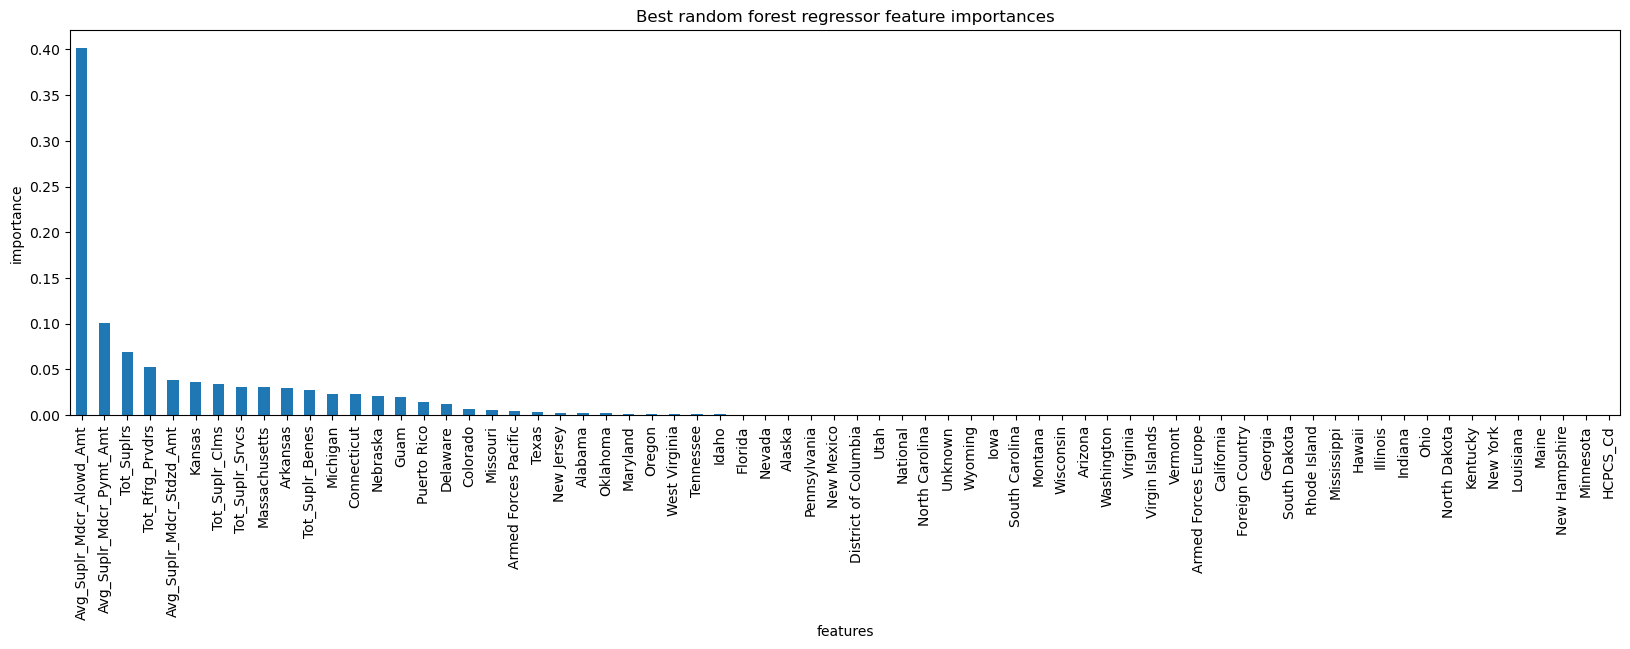

In [106]:
plt.subplots(figsize=(20, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

The dominant top four features in common with the linear model are:

* Avg_Suplr_Mdcr_Allowd_Amt
* Avg_Suply_Mdcr_Pymt_Amt
* Tot_Suplrs
* Tot_Rfrg_Prvdrs

### Final Model Selection

Linear regression model performance

In [107]:
lr_neg_mae = cross_validate(lr_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [108]:
lr_mae_mean = np.mean(-1 * lr_neg_mae['test_score'])
lr_mae_std = np.std(-1 * lr_neg_mae['test_score'])
lr_mae_mean, lr_mae_std

(3.424689264181891, 1.058065224609521)

In [109]:
mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test))

3.481190247890609

Random forest regression model performance

In [110]:
rf_neg_mae = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [111]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(4.077254281992444, 0.5129983854023517)

In [112]:
mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))

3.306317733266665

### Conclusion

Comparing the mae on the test set, the random forest model appears to perform slightly better than the linear regression model.

### Data Quantity Assessment

In [113]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(pipe, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

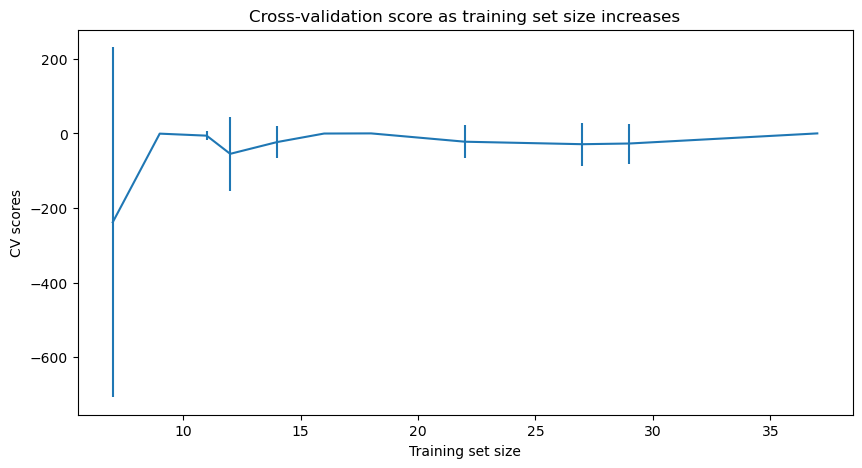

In [114]:
plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');

There initial rapid improvement in model scores but levels off which indicates that adding more data does not significantly improve model performance beyond a certain point.

### Save best model object from pipeline

We will find the best model from the above cross validation and save the model as a file 'medical_device_model.pkl'.

In [115]:
best_model = rf_grid_cv.best_estimator_
best_model.version = '1.0'
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in X_train.columns]

In [116]:
joblib.dump(best_model, 'medical_device_model.pkl')

['medical_device_model.pkl']

In [117]:
with open('X_train.pkl', 'wb') as file:
    pickle.dump(X_train, file)
with open('y_train.pkl', 'wb') as file:
    pickle.dump(y_train, file)

In [118]:
with open('X_test.pkl', 'wb') as file:
    pickle.dump(X_test, file)
with open('y_test.pkl', 'wb') as file:
    pickle.dump(y_test, file)